# Proyecto final BEDU
**Módulo 3: Procesamiento de datos con Python**  
**Integrantes**:
* Andrés Orduña
* Erick Isaac Navarro Delgado
* José Hernández
* Ricardo Yair Nava

# Antecedentes 

El SARS-CoV-2 es un virus perteneciente a la familia de los coronavirus causante de la enfermedad COVID-19. Dicho virus se ha dispersado rápidamente en todo el mundo, dando lugar a una de las pandemias más grandes y serias que el mundo haya visto en décadas.

Esta pandemia ha impactado diversas facetas de la vida humana como la educación y ha comprometido la economía de muchas personas, así como el sistema de salud de todos los gobiernos en el mundo. 

Contar con modelos que predigan el comportamiento del número de infectados en el futuro es altamente deseado debido a que podrían ayudar a conocer los escenarios más probables y, de esta manera, mitigar las pérdidas humanas sin comprometer la economía del país. 

En este proyecto, se concentrarán los datos relevantes para el desarrollo posterior de un modelo que tome en cuenta el número de casos, muertes, la movilidad y el inicio de la reciente estrategia de vacunación en México.

# Problema
Debido a los múltiples factores que regulan la dinámica de contagio del SARS-CoV-2, pocos modelos han logrado predecir correctamente el comportamiento de este fenómeno en el país. 

# Preguntas clave
* ¿Es posible hacer un modelo lineal que se ajuste a la evolución de la pandemia a partir de las variables contempladas?
* ¿Es posible hacer un modelo de series de tiempo que sea adecuado para describir la evolución de la pandemia?
* ¿Es posible hacer una predicción de la evolución de la pandemia con un horizonte de tiempo relativamente significativo?
* ¿Hay variables, además de las ya mencionadas, que expliquen mejor la evolución de los contagios?

# Hipótesis
La dinámica del contagio del SARS-CoV-2 se podrá modelar con variables como el número de contagios, el número de desesos, el numero de vacunados y la movilidad urbana.

Las primeras tres variables serán útiles para generar un modelo epidemiológico tipo SIR (Susceptibles, Infectados, Recuperados). Mientras que la variable de movilidad urbana servirá para probar otros modelos que consideren mas variables.

# Colección de datos
Para responder las preguntas previamente planteadas, obtuvimos datos de cuatro bases distintas que contenían información de: 
* [Número de casos](https://data.humdata.org/hxlproxy/data/download/time_series_covid19_confirmed_global_narrow.csv?dest=data_edit&filter01=explode&explode-header-att01=date&explode-value-att01=value&filter02=rename&rename-oldtag02=%23affected%2Bdate&rename-newtag02=%23date&rename-header02=Date&filter03=rename&rename-oldtag03=%23affected%2Bvalue&rename-newtag03=%23affected%2Binfected%2Bvalue%2Bnum&rename-header03=Value&filter04=clean&clean-date-tags04=%23date&filter05=sort&sort-tags05=%23date&sort-reverse05=on&filter06=sort&sort-tags06=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv)
* [Número de muertes](https://data.humdata.org/hxlproxy/data/download/time_series_covid19_deaths_global_narrow.csv?dest=data_edit&filter01=explode&explode-header-att01=date&explode-value-att01=value&filter02=rename&rename-oldtag02=%23affected%2Bdate&rename-newtag02=%23date&rename-header02=Date&filter03=rename&rename-oldtag03=%23affected%2Bvalue&rename-newtag03=%23affected%2Binfected%2Bvalue%2Bnum&rename-header03=Value&filter04=clean&clean-date-tags04=%23date&filter05=sort&sort-tags05=%23date&sort-reverse05=on&filter06=sort&sort-tags06=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv)
* [Número de vacunas](https://proxy.hxlstandard.org/data.csv?tagger-match-all=on&tagger-01-header=location&tagger-01-tag=%23country%2Bname&tagger-02-header=iso_code&tagger-02-tag=%23country%2Bcode&tagger-03-header=date&tagger-03-tag=%23date&tagger-04-header=total_vaccinations&tagger-04-tag=%23total%2Bvaccinations&tagger-08-header=daily_vaccinations&tagger-08-tag=%23total%2Bvaccinations%2Bdaily&url=https%3A%2F%2Fraw.githubusercontent.com%2Fowid%2Fcovid-19-data%2Fmaster%2Fpublic%2Fdata%2Fvaccinations%2Fvaccinations.csv&header-row=1&dest=data_view)
* [Movilidad](https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv)

# Análisis exploratorio, limpieza y transformación de datos

## Casos de COVID-19

Como primer paso, cargamos los datos relacionados a los casos de COVID-19 para su lectura y visuaización.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

url_1="https://data.humdata.org/hxlproxy/data/download/time_series_covid19_confirmed_global_narrow.csv?dest=data_edit&filter01=explode&explode-header-att01=date&explode-value-att01=value&filter02=rename&rename-oldtag02=%23affected%2Bdate&rename-newtag02=%23date&rename-header02=Date&filter03=rename&rename-oldtag03=%23affected%2Bvalue&rename-newtag03=%23affected%2Binfected%2Bvalue%2Bnum&rename-header03=Value&filter04=clean&clean-date-tags04=%23date&filter05=sort&sort-tags05=%23date&sort-reverse05=on&filter06=sort&sort-tags06=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv"

In [ ]:
covid_casos=pd.read_csv(url_1)

In [ ]:
covid_casos.head()

,Province/State,Country/Region,Lat,Long,Date,Value
0,#adm1+name,#country+name,#geo+lat,#geo+lon,#date,#affected+infected+value+num
1,NaN,Afghanistan,33.93911,67.709953,2021-03-13,55959
2,NaN,Afghanistan,33.93911,67.709953,2021-03-12,55959
3,NaN,Afghanistan,33.93911,67.709953,2021-03-11,55917
4,NaN,Afghanistan,33.93911,67.709953,2021-03-10,55894


Como podemos observar, esta base de datos contiene datos de países de todo el mundo. Para completar nuestro objetivo de hacer un modelo con los datos de México, realizamos un filtro para quedarnos únicamente con los casos de este país a lo largo del tiempo

In [ ]:
mexico_casos=covid_casos[covid_casos['Country/Region']=="Mexico"]

In [ ]:
mexico_casos.head()

,Province/State,Country/Region,Lat,Long,Date,Value
75061,NaN,Mexico,23.6345,-102.5528,2021-03-13,2163875
75062,NaN,Mexico,23.6345,-102.5528,2021-03-12,2157771
75063,NaN,Mexico,23.6345,-102.5528,2021-03-11,2150955
75064,NaN,Mexico,23.6345,-102.5528,2021-03-10,2144486
75065,NaN,Mexico,23.6345,-102.5528,2021-03-09,2137884


Como control adicional, verificamos que no tengamos latitudes y longitudes correspondientes a otros lugares.

In [ ]:
pd.unique(mexico_casos['Lat'])

array(['23.6345'], dtype=object)

Posteriormente, eliminamos las columnas que serán irrelevantes para nuestro análisis y no poseen información alguna. 

In [ ]:
mexico_casos=mexico_casos.drop(columns=['Province/State','Country/Region','Lat','Long'])

In [ ]:
mexico_casos.head()

,Date,Value
75061,2021-03-13,2163875
75062,2021-03-12,2157771
75063,2021-03-11,2150955
75064,2021-03-10,2144486
75065,2021-03-09,2137884


Después, modificamos los tipos de datos de las columnas para que correspondan con el tipo de dato que tenemos en esos campos. 

In [ ]:
mexico_casos.dtypes

Date     object
Value    object
dtype: object

In [ ]:
mexico_casos['Value']=pd.to_numeric(mexico_casos['Value'],errors='coerce')
mexico_casos['Date']=pd.to_datetime(mexico_casos['Date'], errors='coerce')

In [ ]:
mexico_casos.dtypes

Date     datetime64[ns]
Value             int64
dtype: object

In [ ]:
mexico_casos.head()

,Date,Value
75061,2021-03-13,2163875
75062,2021-03-12,2157771
75063,2021-03-11,2150955
75064,2021-03-10,2144486
75065,2021-03-09,2137884


Finalmente, hacemos una visualización rápida de los datos para observar su comportamiento.

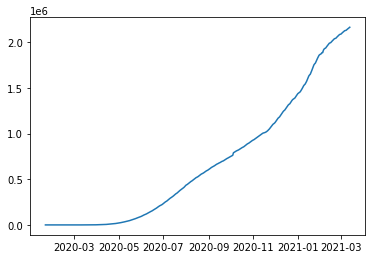

In [ ]:
plt.plot(mexico_casos['Date'],mexico_casos['Value'])

Además, contamos la cantidad de reportes para estimar la cantidad de días de los cuales tenemos información en el país

In [ ]:
mexico_casos.count

<bound method DataFrame.count of             Date    Value
75061 2021-03-13  2163875
75062 2021-03-12  2157771
75063 2021-03-11  2150955
75064 2021-03-10  2144486
75065 2021-03-09  2137884
...          ...      ...
75473 2020-01-26        0
75474 2020-01-25        0
75475 2020-01-24        0
75476 2020-01-23        0
75477 2020-01-22        0

[417 rows x 2 columns]>

Posteriormente, generamos un data frame con los casos diarios de COVID-19 a partir de los datos acumulados y lo visualizamos.

In [ ]:
mexico_casos=mexico_casos.sort_values(by='Date',axis=0, ascending=True)

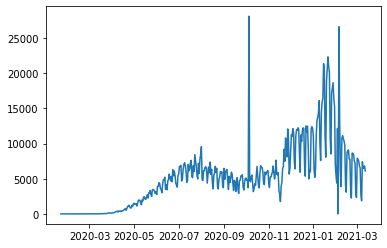

In [ ]:
plt.plot(mexico_casos['Date'],np.append(0,np.diff(mexico_casos['Value'],n=1)))

Finalmente, anexamos el número de casos diarios a nuestro data frame original para terminar con 3 columnas: fecha, casos acumulados y casos diarios

In [ ]:
mexico_casos['casos_diarios']=np.append(0,np.diff(mexico_casos['Value'],n=1))
mexico_casos = mexico_casos.rename(columns = {"Fecha":"fecha", "Value":"casos_acumulados"})

In [ ]:
mexico_casos.tail()

,Date,casos_acumulados,casos_diarios
75065,2021-03-09,2137884,7407
75064,2021-03-10,2144486,6602
75063,2021-03-11,2150955,6469
75062,2021-03-12,2157771,6816
75061,2021-03-13,2163875,6104


## Muertes por COVID-19

Dado que este DataFrame esta organizado de la misma manera  que el de casos de COVID-19 (puesto que provienen de la misma organización), los pasos para para limpiar, transformar y visualizar los datos son los mismos.

En los siguientes bloques de código se descargan los datos, se realiza un filtro para seleccionar los que corresponden a México, se eliminan las columnas irrelevantes, se renombran las que se conservan y se transforman los datos para que sean del tipo correspondiente.

In [ ]:
url_2="https://data.humdata.org/hxlproxy/data/download/time_series_covid19_deaths_global_narrow.csv?dest=data_edit&filter01=explode&explode-header-att01=date&explode-value-att01=value&filter02=rename&rename-oldtag02=%23affected%2Bdate&rename-newtag02=%23date&rename-header02=Date&filter03=rename&rename-oldtag03=%23affected%2Bvalue&rename-newtag03=%23affected%2Binfected%2Bvalue%2Bnum&rename-header03=Value&filter04=clean&clean-date-tags04=%23date&filter05=sort&sort-tags05=%23date&sort-reverse05=on&filter06=sort&sort-tags06=%23country%2Bname%2C%23adm1%2Bname&tagger-match-all=on&tagger-default-tag=%23affected%2Blabel&tagger-01-header=province%2Fstate&tagger-01-tag=%23adm1%2Bname&tagger-02-header=country%2Fregion&tagger-02-tag=%23country%2Bname&tagger-03-header=lat&tagger-03-tag=%23geo%2Blat&tagger-04-header=long&tagger-04-tag=%23geo%2Blon&header-row=1&url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv"
covid_muertes=pd.read_csv(url_2)

In [ ]:
mexico_muertes = covid_muertes[covid_muertes['Country/Region']=="Mexico"]
mexico_muertes = mexico_muertes.drop(columns=['Province/State','Country/Region','Lat','Long'])

mexico_muertes['Value']=pd.to_numeric(mexico_muertes['Value'],errors='coerce')
mexico_muertes['Date']=pd.to_datetime(mexico_muertes['Date'], errors='coerce')
mexico_muertes = mexico_muertes.rename(columns = {"Date":"fecha", "Value":"muertes_acumuladas"})
print(mexico_muertes.dtypes)
mexico_muertes.head()

fecha                 datetime64[ns]
muertes_acumuladas             int64
dtype: object


,fecha,muertes_acumuladas
75061,2021-03-13,194490
75062,2021-03-12,193851
75063,2021-03-11,193152
75064,2021-03-10,192491
75065,2021-03-09,191789


Como se puede observar, la transformación de los datos se realizó correctamente y las columnas que tenemos son las informativas para nuestro problema. 

Después de esto, graficamos los datos para observar su comportamiento.

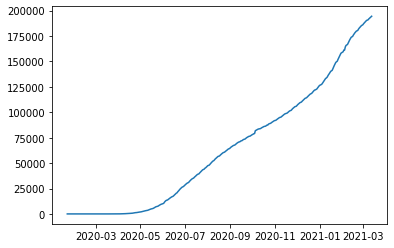

In [ ]:
plt.plot(mexico_muertes['fecha'],mexico_muertes['muertes_acumuladas'])

Finalmente, de manera similar al inciso anterior, se calculan las muertes diarias y se anexan como una columna nueva al dataframe de muertes por covid en México. 

In [ ]:
mexico_muertes=mexico_muertes.sort_values(by='fecha',axis=0, ascending=True)

In [ ]:
mexico_muertes['muertes_diarias']=np.append(0,np.diff(mexico_muertes['muertes_acumuladas'],n=1))

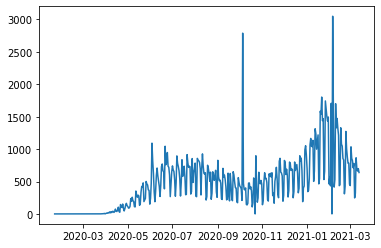

In [ ]:
plt.plot(mexico_muertes["fecha"],mexico_muertes["muertes_diarias"])

In [ ]:
mexico_muertes.tail()

,fecha,muertes_acumuladas,muertes_diarias
75065,2021-03-09,191789,866
75064,2021-03-10,192491,702
75063,2021-03-11,193152,661
75062,2021-03-12,193851,699
75061,2021-03-13,194490,639


Como se puede observar, el data frame final posee información de las muertes diarias y acumuladas debido al COVID-19 por fecha en México, como se deseaba.

## Vacunas contra COVID-19

Posteriormente, analizamos la base de datos de número de personas vacunadas contra el COVID-19 por país. Dado que esta base de datos pertenece a una organización diferente, iniciamos explorando sus columnas para seleccionar los datos relevantes. 

In [ ]:
url_3="https://proxy.hxlstandard.org/data.csv?tagger-match-all=on&tagger-01-header=location&tagger-01-tag=%23country%2Bname&tagger-02-header=iso_code&tagger-02-tag=%23country%2Bcode&tagger-03-header=date&tagger-03-tag=%23date&tagger-04-header=total_vaccinations&tagger-04-tag=%23total%2Bvaccinations&tagger-08-header=daily_vaccinations&tagger-08-tag=%23total%2Bvaccinations%2Bdaily&url=https%3A%2F%2Fraw.githubusercontent.com%2Fowid%2Fcovid-19-data%2Fmaster%2Fpublic%2Fdata%2Fvaccinations%2Fvaccinations.csv&header-row=1&dest=data_view"
vacunas_covid=pd.read_csv(url_3)

In [ ]:
vacunas_covid.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,#country+name,#country+code,#date,#total+vaccinations,NaN,NaN,NaN,#total+vaccinations+daily,NaN,NaN,NaN,NaN
1,Albania,ALB,2021-01-10,0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
2,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64,NaN,NaN,NaN,22.0
3,Albania,ALB,2021-01-12,128,128.0,NaN,NaN,64,0.00,0.00,NaN,22.0
4,Albania,ALB,2021-01-13,188,188.0,NaN,60.0,63,0.01,0.01,NaN,22.0


Después de explorar los datos, decidimos hacer un subset para quedarnos únicamente con la información de México y 3 columnas, las cuales corresponden a la fecha, al número de personas totalmente vacunadas y las percialmente vacunadas.  

In [ ]:
mexico_vac=vacunas_covid[vacunas_covid['location']=="Mexico"]
mexico_vac=pd.DataFrame({'fecha':mexico_vac["date"],'totalmente_vacunados':mexico_vac["people_fully_vaccinated"],'parcialmente_vacunados':mexico_vac['total_vaccinations']})

In [ ]:
mexico_vac.tail()

,fecha,totalmente_vacunados,parcialmente_vacunados
3896,2021-03-09,605801.0,3100868
3897,2021-03-10,606000.0,3488000
3898,2021-03-11,NaN,3800000
3899,2021-03-12,609460.0,4005131
3900,2021-03-13,609874.0,4214294


Se puede observar que el data frame posee las columnas que queríamos de forma correcta. Además, se ve que aparecen algunos valores como NaN, lo cual probablemente corresponde a días en los que no hubo vacunación o no hay registro de ello. Decidimos  no remover las filas que tuvieran algún NaN para no perder información de la columna vecina. 

Posteriormente, evaluamos el tipo de datos para ver que correspondiera con lo que se espera de su columna. 

In [ ]:
mexico_vac.dtypes

fecha                      object
totalmente_vacunados      float64
parcialmente_vacunados     object
dtype: object

Después de esto, hicimos la transformación del tipo de datos y una visualización rápida del número total de vacunas aplicadas, así como las personas que han recibido la dósis completa (usualmente dos, lo cual depende del tipo de vacuna).

In [ ]:
mexico_vac['parcialmente_vacunados']=pd.to_numeric(mexico_vac['parcialmente_vacunados'],errors='coerce')
mexico_vac['fecha']=pd.to_datetime(mexico_vac['fecha'], errors='coerce')
mexico_vac.dtypes

fecha                     datetime64[ns]
totalmente_vacunados             float64
parcialmente_vacunados           float64
dtype: object

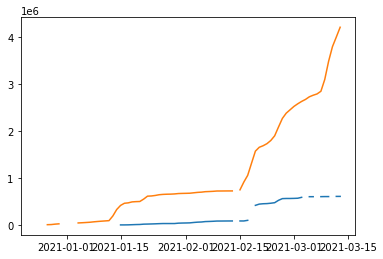

In [ ]:
plt.plot(mexico_vac['fecha'],mexico_vac['totalmente_vacunados'],mexico_vac['fecha'],mexico_vac['parcialmente_vacunados'])

## Movilidad
Por último, descargamos, transformamos y limpiamos la base de datos de movilidad para obtener la información relevante de México. 

In [ ]:
url_4="https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
movilidad=pd.read_csv(url_4)
movilidad.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


El primer paso que realizamos fue hacer un subset en las filas para quedarnos con los datos de México. 

In [ ]:
mexmo=movilidad[movilidad['country_region']=='Mexico']

In [ ]:
mexmo.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2371909,MX,Mexico,NaN,NaN,NaN,NaN,NaN,ChIJU1NoiDs6BIQREZgJa760ZO0,2020-02-15,6.0,4.0,6.0,4.0,3.0,-1.0
2371910,MX,Mexico,NaN,NaN,NaN,NaN,NaN,ChIJU1NoiDs6BIQREZgJa760ZO0,2020-02-16,7.0,6.0,7.0,6.0,2.0,-1.0
2371911,MX,Mexico,NaN,NaN,NaN,NaN,NaN,ChIJU1NoiDs6BIQREZgJa760ZO0,2020-02-17,2.0,4.0,3.0,5.0,11.0,-2.0
2371912,MX,Mexico,NaN,NaN,NaN,NaN,NaN,ChIJU1NoiDs6BIQREZgJa760ZO0,2020-02-18,0.0,-1.0,3.0,2.0,9.0,-2.0
2371913,MX,Mexico,NaN,NaN,NaN,NaN,NaN,ChIJU1NoiDs6BIQREZgJa760ZO0,2020-02-19,0.0,0.0,2.0,3.0,8.0,-1.0


Posteriormente, eliminamos las columnas que no son necesarias para el análisis o que tienen datos sin información.

In [ ]:
mexmo=mexmo.drop(columns=['country_region_code','country_region','sub_region_1','sub_region_2','metro_area','iso_3166_2_code','census_fips_code','place_id'])

In [ ]:
mexmo.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2371909,2020-02-15,6.0,4.0,6.0,4.0,3.0,-1.0
2371910,2020-02-16,7.0,6.0,7.0,6.0,2.0,-1.0
2371911,2020-02-17,2.0,4.0,3.0,5.0,11.0,-2.0
2371912,2020-02-18,0.0,-1.0,3.0,2.0,9.0,-2.0
2371913,2020-02-19,0.0,0.0,2.0,3.0,8.0,-1.0


Se revisan los tipos de datos para transformar aquellos que lo requieran. Además de eso, cambiamos el nombre de las columnas para que sean más cortos. 

In [ ]:
mexmo.dtypes

date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [ ]:
mexmo['date']=pd.to_datetime(mexmo['date'], errors='coerce')

In [ ]:
mexmo=mexmo.rename({"date":"fecha",'retail_and_recreation_percent_change_from_baseline':'retail_recreation','grocery_and_pharmacy_percent_change_from_baseline':'grocery_pharmacy','parks_percent_change_from_baseline':'parks','transit_stations_percent_change_from_baseline':'transit_station','workplaces_percent_change_from_baseline':'workplace','residential_percent_change_from_baseline':'residential'}, axis=1)

In [ ]:
mexmo.dtypes

fecha                datetime64[ns]
retail_recreation           float64
grocery_pharmacy            float64
parks                       float64
transit_station             float64
workplace                   float64
residential                 float64
dtype: object

Después, hicimos una visualización rápida de los datos y observamos que las fechas no estaban ordenadas correctamente. Por lo tanto, las ordenamos con la función DataFrame.sort_values().

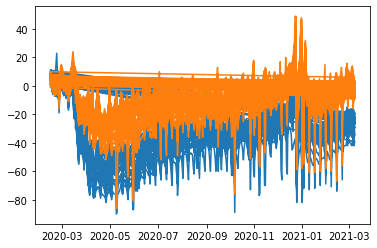

In [ ]:
plt.plot(mexmo['fecha'],mexmo['retail_recreation'],mexmo['fecha'],mexmo['grocery_pharmacy'])

In [ ]:
mexmo=mexmo.sort_values(by='fecha',axis=0)

Posteriormente, observamos la visualización y notamos que ya se veía de manera correcta. 

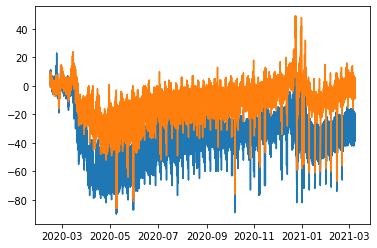

In [ ]:
plt.plot(mexmo['fecha'],mexmo['retail_recreation'],mexmo['fecha'],mexmo['grocery_pharmacy'])

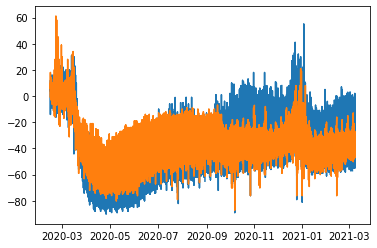

In [ ]:
plt.plot(mexmo['fecha'],mexmo['transit_station'],mexmo['fecha'],mexmo['parks'])

Con estas gráficas sencillas, es interesante observar que la movilidad residencial aumenta tras el inicio de la pandemia (color naranja), en contraste con la movilidad en los lugares de trabajo (color azul).

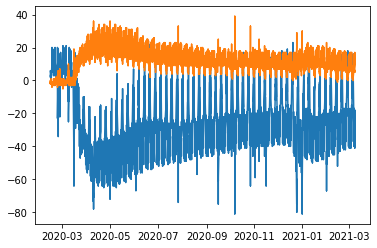

In [ ]:
plt.plot(mexmo['fecha'],mexmo['workplace'],mexmo['fecha'],mexmo['residential'])

## Creación del data frame final
Finalmente, realizamos un merge para unir todos los data frames que tenemos por fecha, con el objetivo de reunir todos nuestros datos en una misma estructura. Esta misma será de gran utilidad para, en el futuro, tener toda la información relevante para nuestro estudio concentrada en un mismo data frame. 

In [ ]:
df1 = pd.merge(mexico_vac, mexico_muertes, on='fecha', left_index=True )
df1.head()

,fecha,totalmente_vacunados,parcialmente_vacunados,muertes_acumuladas,muertes_diarias
75140,2020-12-24,NaN,2924.0,121172,861
75139,2020-12-25,NaN,NaN,121837,665
75138,2020-12-26,NaN,NaN,122026,189
75137,2020-12-27,NaN,6824.0,122426,400
75136,2020-12-28,NaN,9579.0,122855,429


In [ ]:
df2 = pd.merge(df1, mexmo, on='fecha', left_index = True)
df2.head()

,fecha,totalmente_vacunados,parcialmente_vacunados,muertes_acumuladas,muertes_diarias,retail_recreation,grocery_pharmacy,parks,transit_station,workplace,residential
2381169,2020-12-24,NaN,2924.0,121172,861,-8.0,39.0,-13.0,-8.0,-42.0,8.0
2373389,2020-12-24,NaN,2924.0,121172,861,-18.0,23.0,-29.0,-18.0,-33.0,6.0
2383503,2020-12-24,NaN,2924.0,121172,861,-10.0,47.0,0.0,-10.0,-34.0,8.0
2380780,2020-12-24,NaN,2924.0,121172,861,-23.0,13.0,-36.0,-31.0,-33.0,7.0
2381947,2020-12-24,NaN,2924.0,121172,861,-14.0,33.0,-25.0,4.0,-43.0,9.0


In [ ]:
mexico_covid_final = pd.merge(df2, mexico_casos, left_on = 'fecha', right_on='Date', left_index= True)
mexico_covid_final = mexico_covid_final.drop(columns='Date')
mexico_covid_final.head()

Y finalmente exportamos nuestro dataframe final a formato .csv con el fin de poder utilizarlo en el futuro sin volver a ejecutar todos los pasos anteriores.

In [ ]:
pd.mexico_covid_final.to_csv('.../mexico_covid_final.csv')

#Perspectivas
El data frame que hemos creado será útil para los siguientes pasos en el proyecto, los cuales son: 
* Probar la dependencia de los casos de COVID-19 con respecto de la movilidad urbana.
* Generar un modelo SIR del COVID-19 en México.
* Generar un modelo considerando otras variables como la movilidad urbana.
* Generar un modelo de series de tiempo para intentar predecir los casos de COVID-19.